In [1]:
import importlib
import skfda

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from Utils import paths


importlib.reload(paths)

<module 'Utils.paths' from 'C:\\Users\\jllav\\IdeaProjects\\TFM\\Utils\\paths.py'>

In [2]:
X = pd.read_pickle(f'{paths.CC_DATA_PATH}/X.pickle')
y = pd.read_pickle(f'{paths.CC_DATA_PATH}/y.pickle')
X.shape, y.shape

((538, 2399), (538,))

In [3]:
X.index[X.isna().sum(axis=1) != 0]

Int64Index([], dtype='int64')

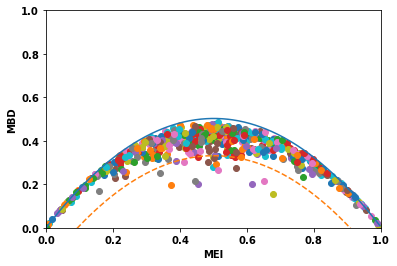

In [4]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
outliergram = skfda.exploratory.visualization.Outliergram(fdata=X_fd)
outliergram.plot()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram.png")

In [5]:
outliergram_outliers_idx = X.index[np.where(outliergram.outlier_detector.fit_predict(X_fd) == -1, True, False)]
outliergram_outliers_idx

Int64Index([1007, 1009, 1010, 1027, 1035, 1055, 1081, 1169, 1197, 1198, 1312,
            1345, 1388, 1409, 1418, 1482, 2024],
           dtype='int64')

In [6]:
y[outliergram_outliers_idx].value_counts()

0    11
1     6
Name: ph, dtype: int64

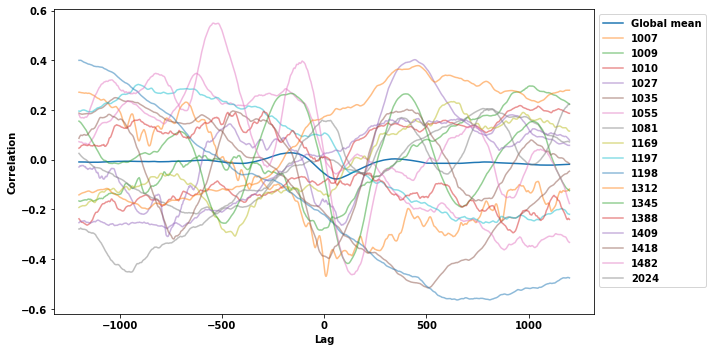

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in outliergram_outliers_idx:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
fig.tight_layout()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram_outliers.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram_outliers.png")

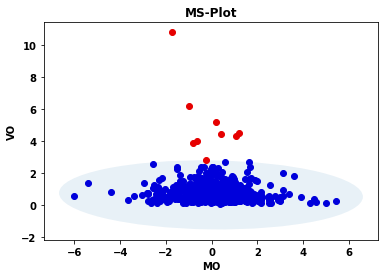

In [8]:
ms_plot = skfda.exploratory.visualization.MagnitudeShapePlot(fdata=X_fd)
ms_plot.plot()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MSPlot.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MSPlot.png")

In [9]:
ms_outliers_idx = X.index[np.where(ms_plot.outlier_detector.fit_predict(X_fd) == -1, True, False)]
ms_outliers_idx

Int64Index([1007, 1035, 1055, 1197, 1198, 1312, 1409, 1482, 2024], dtype='int64')

In [10]:
y[ms_outliers_idx].value_counts()

0    5
1    4
Name: ph, dtype: int64

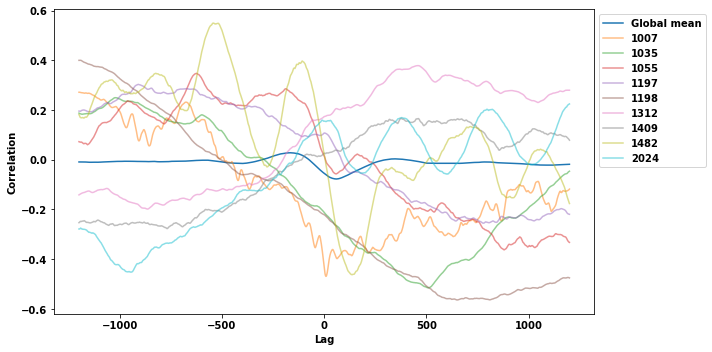

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in ms_outliers_idx:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
fig.tight_layout()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MSPlot_outliers.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MSPlot_outliers.png")

In [12]:
# Esto prueba que todos los outliers por Outliergram lo son tb por MagnitudeShapePlot
set(outliergram_outliers_idx).intersection(set(ms_outliers_idx)) == set(ms_outliers_idx)

True

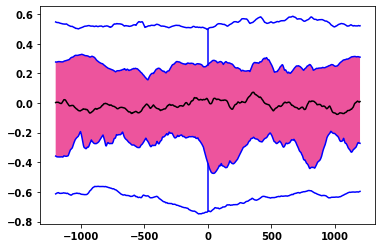

In [13]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
mbd_boxplot = skfda.exploratory.visualization.Boxplot(X_fd, depth_method=skfda.exploratory.depth.ModifiedBandDepth())
mbd_boxplot.plot()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MBD_Boxplot.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MBD_Boxplot.png")

In [14]:
mbd_outlier_detector = skfda.exploratory.outliers.BoxplotOutlierDetector(depth_method=skfda.exploratory.depth.ModifiedBandDepth())
mbd_outliers_idx = X.index[np.where(mbd_outlier_detector.fit_predict(X_fd) == -1, True, False)]
mbd_outliers_idx

Int64Index([], dtype='int64')

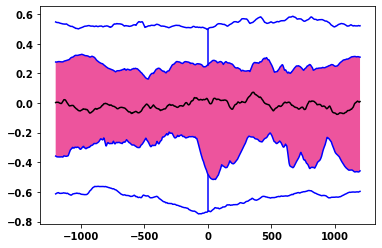

In [15]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
id_boxplot = skfda.exploratory.visualization.Boxplot(X_fd, depth_method=skfda.exploratory.depth.IntegratedDepth())
id_boxplot.plot()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_ID_Boxplot.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_ID_Boxplot.png")

In [16]:
id_outlier_detector = skfda.exploratory.outliers.BoxplotOutlierDetector(depth_method=skfda.exploratory.depth.IntegratedDepth())
id_outliers_idx = X.index[np.where(id_outlier_detector.fit_predict(X_fd) == -1, True, False)]
id_outliers_idx

Int64Index([], dtype='int64')

In [17]:
X = pd.read_pickle(f'{paths.CDCOR_DATA_PATH}/X.pickle')
y = pd.read_pickle(f'{paths.CDCOR_DATA_PATH}/y.pickle')
X.shape, y.shape

((538, 2399), (538,))

In [19]:
X.index[X.isna().sum(axis=1) != 0]

Int64Index([], dtype='int64')

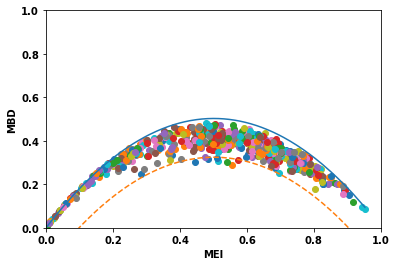

In [20]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
outliergram = skfda.exploratory.visualization.Outliergram(fdata=X_fd)
outliergram.plot()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_Outliergram.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_Outliergram.png")

In [21]:
outliergram_outliers_idx = X.index[np.where(outliergram.outlier_detector.fit_predict(X_fd) == -1, True, False)]
outliergram_outliers_idx

Int64Index([1022, 1024, 1070, 1091, 1362, 1456, 1505], dtype='int64')

In [22]:
y[outliergram_outliers_idx].value_counts()

0    6
1    1
Name: ph, dtype: int64

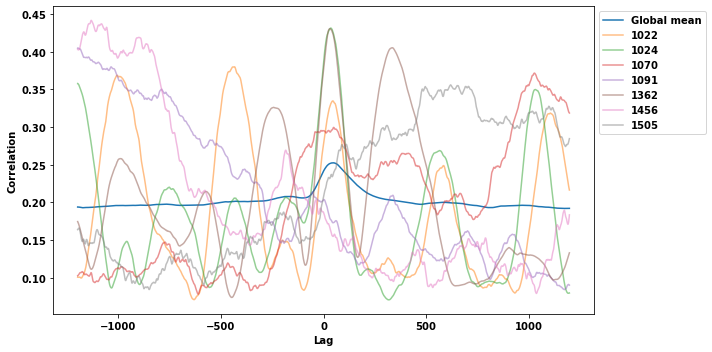

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in outliergram_outliers_idx:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
fig.tight_layout()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_Outliergram_outliers.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_Outliergram_outliers.png")

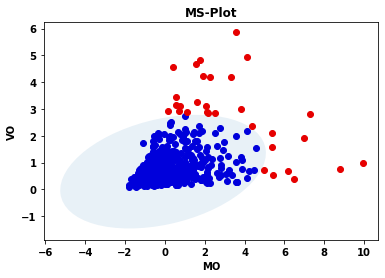

In [24]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
ms_plot = skfda.exploratory.visualization.MagnitudeShapePlot(fdata=X_fd)
ms_plot.plot()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MSPlot.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MSPlot.png")

In [25]:
ms_outliers_idx = X.index[np.where(ms_plot.outlier_detector.fit_predict(X_fd) == -1, True, False)]
ms_outliers_idx

Int64Index([1019, 1022, 1035, 1045, 1086, 1091, 1100, 1120, 1126, 1150, 1151,
            1157, 1191, 1198, 1199, 1219, 1266, 1311, 1350, 1391, 1397, 1415,
            1440, 1456, 1458, 1469, 1482, 1505, 2012, 2024, 2035],
           dtype='int64')

In [26]:
y[ms_outliers_idx].value_counts()

0    22
1     9
Name: ph, dtype: int64

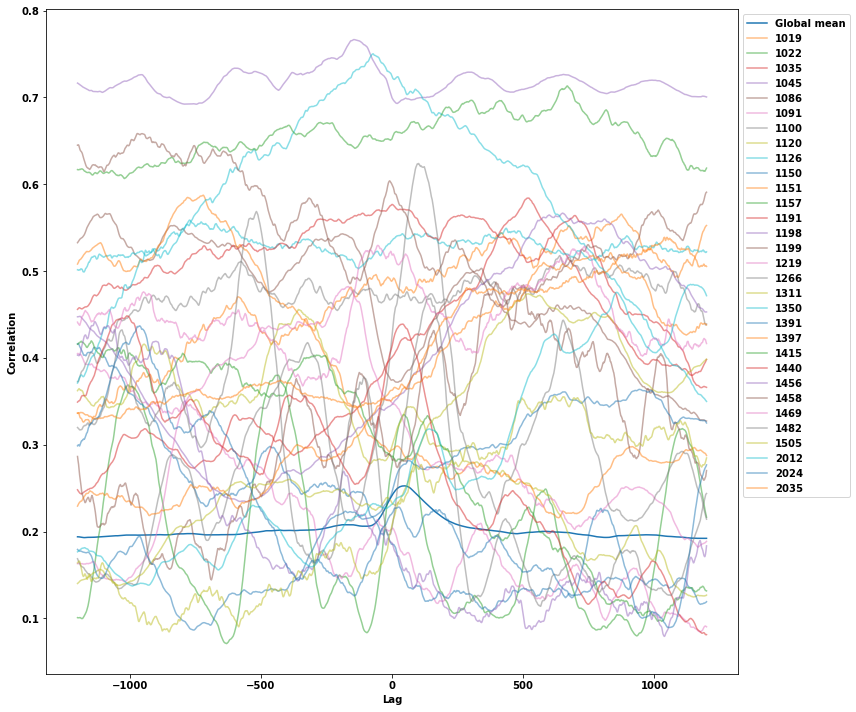

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in ms_outliers_idx:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
fig.tight_layout()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MSPlot_outliers.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MSPlot_outliers.png")

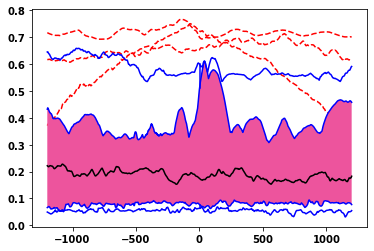

In [33]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
mbd_boxplot = skfda.exploratory.visualization.Boxplot(X_fd, depth_method=skfda.exploratory.depth.ModifiedBandDepth())
mbd_boxplot.plot()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MBD_Boxplot.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MBD_Boxplot.png")

In [34]:
mbd_outlier_detector = skfda.exploratory.outliers.BoxplotOutlierDetector(depth_method=skfda.exploratory.depth.ModifiedBandDepth())
mbd_outliers_idx = X.index[np.where(mbd_outlier_detector.fit_predict(X_fd) == -1, True, False)]
mbd_outliers_idx

Int64Index([1045, 1350, 1415], dtype='int64')

In [35]:
y[mbd_outliers_idx].value_counts()

0    2
1    1
Name: ph, dtype: int64

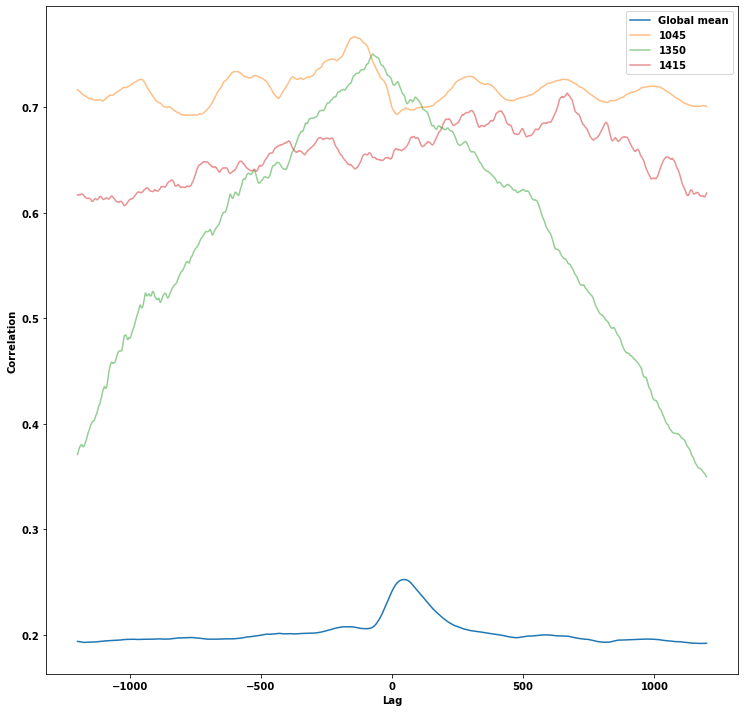

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in mbd_outliers_idx:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
fig.tight_layout()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MBD_Boxplot_outliers.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MBD_Boxplot_outliers.png")

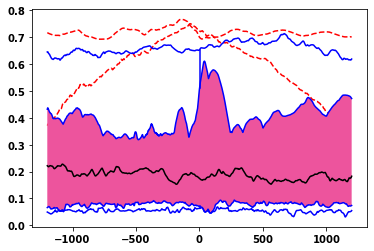

In [37]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
id_boxplot = skfda.exploratory.visualization.Boxplot(X_fd, depth_method=skfda.exploratory.depth.IntegratedDepth())
id_boxplot.plot()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_ID_Boxplot.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_ID_Boxplot.png")

In [38]:
id_outlier_detector = skfda.exploratory.outliers.BoxplotOutlierDetector(depth_method=skfda.exploratory.depth.IntegratedDepth())
id_outliers_idx = X.index[np.where(id_outlier_detector.fit_predict(X_fd) == -1, True, False)]
id_outliers_idx

Int64Index([1045, 1350], dtype='int64')

In [39]:
y[id_outliers_idx].value_counts()

0    1
1    1
Name: ph, dtype: int64

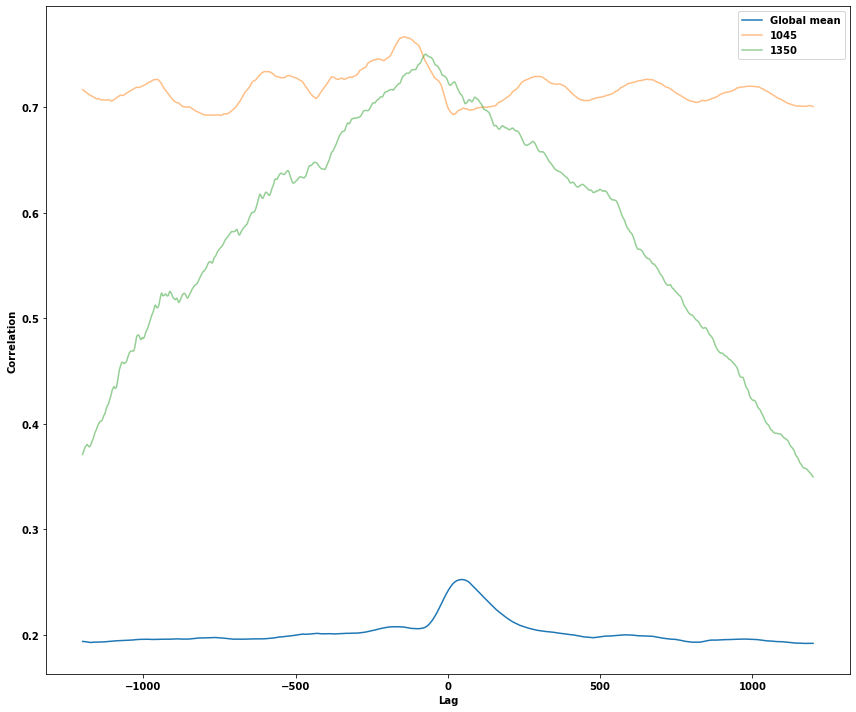

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in id_outliers_idx:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
fig.tight_layout()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_ID_Boxplot_outliers.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_ID_Boxplot_outliers.png")